# 1. Exploratory DataAnalysis

To understand the underlying patterns in the dataset, assess their significance and then include them into the Dataset for further modeling. <br>


**What to do**:<br>
- Graphical and statistical Inspection of the Dataset to get a first impression on possible Features.
- Identify strategies to handle missing Values
- Identify Patterns for further Feature Engineering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [86]:
# Import the Dataset
titanic = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)
combined = pd.concat([titanic.drop('Survived',1), test])

# Create Survived and Non-survived Subsets of the Dataset
surv = titanic[titanic.Survived==1]
nosurv = titanic[titanic.Survived==0]

In [89]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(titanic.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Inspecting the Data

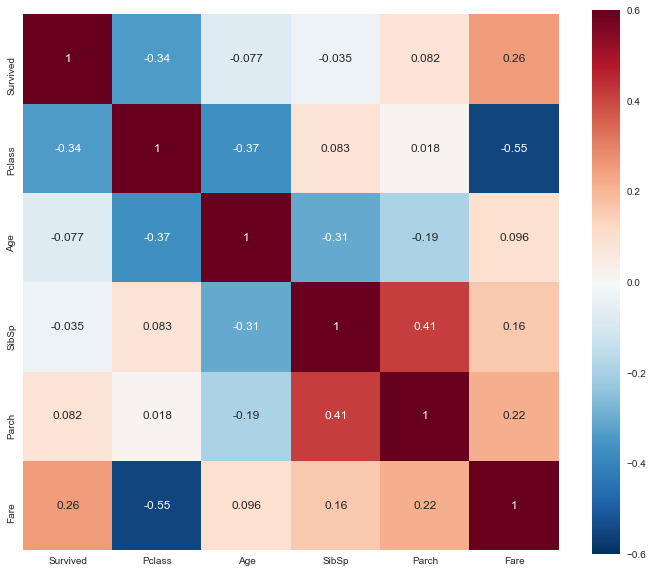

In [5]:
plt.figure(figsize=(12,10))
_ = sns.heatmap(titanic.corr(), vmax=0.6, square=True, annot=True)

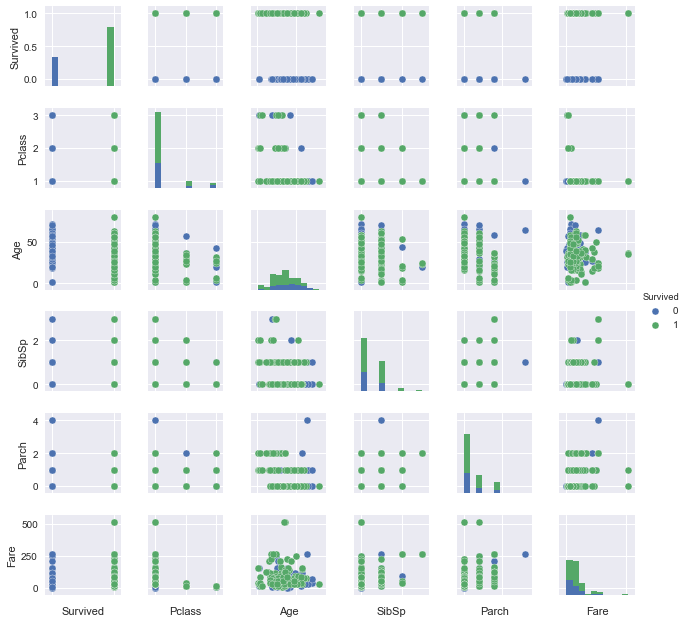

In [6]:
cols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data=titanic.dropna(), vars=cols, size=1.5,
                hue='Survived')
g.set(xticklabels=[])

Median age survivors: 28.3, Median age non-survivers: 30.6


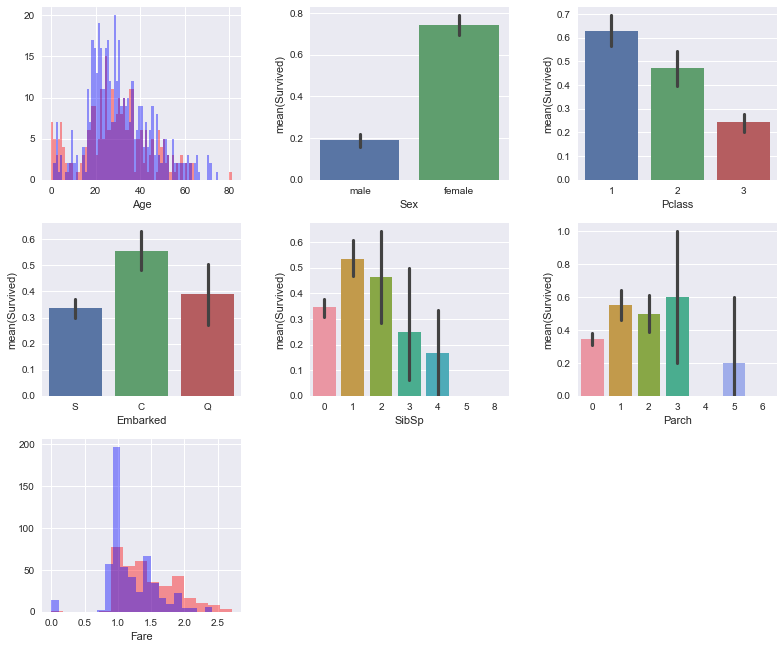

In [7]:
plt.figure(figsize=[12,10])
plt.subplot(331)
# First Plot comparing Age grouped by Survival Status
sns.distplot(titanic.Age[titanic.Survived==1].dropna(), bins=range(0,82,1), kde=False, color='red')
sns.distplot(titanic.Age[titanic.Survived==0].dropna(), bins=range(0,82,1), kde=False, color='blue')


# Plot Distribution of Survival by Gender
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=titanic)

# Plot Distribution of Survival by Class
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=titanic)

# Plot Survival based on Departure
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=titanic)

# Plot Survival by # of Siblings
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=titanic)

# Plot Survival by Parent Child relation
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=titanic)

# Plot Survival by Fare
plt.subplot(337)
sns.distplot(np.log10(titanic.Fare[titanic.Survived==1].dropna().values+1), kde=False, color='red')
sns.distplot(np.log10(titanic.Fare[titanic.Survived==0].dropna().values+1), kde=False, color='blue', axlabel='Fare')

# Layout Adjustment
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(titanic.Age[titanic.Survived==1].dropna().mean(), (titanic.Age[titanic.Survived==0].dropna()).mean()))

### Observations from the Visualization:

**Age**: 0-10 has a high pro. Survial || 20-30 very high prop to not survive || 50 - 85 about even perc.<br>
**Sex**: male: 0.2 || female: 0.7<br>
**Pclass**: The higher the better<br>
**SibSp / Parch**: Large Families and Alone have lower surival prop. || 1-3 Family Members is best<br>
**Fare**: A strong trend, but can not be picked up linearly. Try to logScale to pick up the trend. <br>


#### Inspecting the numerical Distributions and the propabilities for Survival

For 0 and 1,2,3 the numbers are solid and we have enough samples.
Above 3 the numbers per category are becoming very sparse, so we could maybe combine them to get a more intense Feature.

In [8]:
# Using Cross Tables to check for propabilities
pd.crosstab(titanic.SibSp, titanic.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [9]:
pd.crosstab(titanic.SibSp, titanic.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


In [10]:
pd.crosstab(titanic.Embarked, titanic.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


In [11]:
pd.crosstab(titanic.Pclass, titanic.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [12]:
pd.crosstab(titanic.Parch, titanic.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


## Ticket Numbers

Assumptions:
- People traveling together might have a single ticket

In [13]:
print('There are %i unique ticket numbers among the %i tickets'%(titanic.Ticket.nunique(), titanic.Ticket.count()))

There are 681 unique ticket numbers among the 891 tickets


In [21]:
grouped = titanic.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived', 'Name']])
        k += 1
    if (k> 3):
        break

             Survived                                               Name
PassengerId                                                             
258                 1                               Cherry, Miss. Gladys
505                 1                              Maioni, Miss. Roberta
760                 1  Rothes, the Countess. of (Lucy Noel Martha Dye...
             Survived                                    Name
PassengerId                                                  
263                 0                       Taussig, Mr. Emil
559                 1  Taussig, Mrs. Emil (Tillie Mandelbaum)
586                 1                     Taussig, Miss. Ruth
             Survived                            Name
PassengerId                                          
111                 0  Porter, Mr. Walter Chamberlain
476                 0     Clifford, Mr. George Quincy
             Survived                                             Name
PassengerId                           

**Hypotheses:**<br>
Seems likely that if your family survived you have also been very likely to have survived as well.
If you still died then because you were a man and helped your wife/partner/daughter.

*Question:* <br>
Is it more likely to identify Families by common last name, or by Ticket Number??


## 3. Relations between Features

Let's connect Features that so far seemed to identify patterns of maximum Survival / maximum Death and inspect their correlational patterns.

First let's look at the moderations in the Dataset, aka. where an additional third factor actually explains the correlation between two variables (or alters it)

### 3.1 Gender and Survival - Interaction Analysis

Hypotheses:<br>
- The Survival of Male and Female moderated by their class
- Survival both in Male and Female Groups strongly depends on their Age ,but differently
- The Embarkement has an influence on survival moderated by Class

Learnings:<br>
- Both the Factorplot and the mosaicplot indicate that almost all females that died where 3rd Class
- For Males being in 1st gives a survival boost, otherwise roughly equal proportions
- Except for 3rd class teh survival for Embarked=="Q" is close to 100% split between male and female

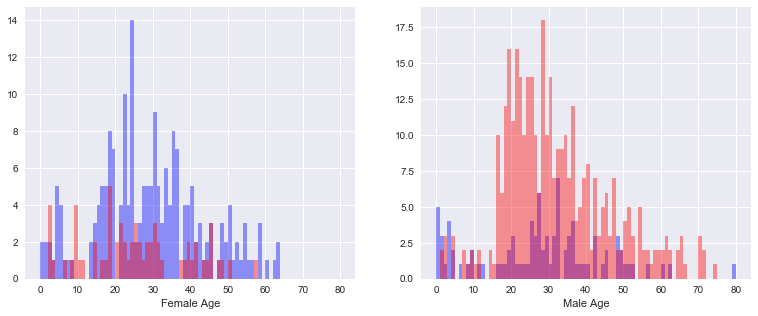

In [15]:
# Survival based on Sex
msurv = titanic[(titanic.Survived==1) & (titanic.Sex=='male')]
fsurv = titanic[(titanic.Survived==1) & (titanic.Sex=='female')]

# Death based on Sex
mdeath = titanic[(titanic.Survived==0) & (titanic.Sex=='male')]
fdeath = titanic[(titanic.Survived==0) & (titanic.Sex=='female')]

# Plotting their Distributions
plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0,81,1), kde=False, color='blue')
sns.distplot(fdeath['Age'].dropna().values, bins=range(0,81,1), kde=False, color='red',
            axlabel='Female Age')

plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0,81,1), kde=False, color='blue')
sns.distplot(mdeath['Age'].dropna().values, bins=range(0,81,1), kde=False, color='red',
            axlabel='Male Age')

**Learnings:**<br>
- Female: Survival(blue) highet between 18-40yr
- Male: Deatch(red) highest between 18-40yr
- Boys have proportional chances of survival than Men
- Girls have worse chances than Women

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
_ = mosaic(titanic, ['Survived', 'Sex', 'Pclass'])

ImportError: No module named 'statsmodels'

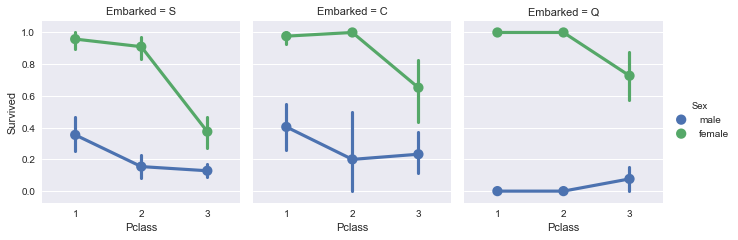

In [17]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', 
                   data=titanic, aspect=0.9, size=3.5, ci=95.0)

**Learnings:**<br>
- Both the factorplot and the mosaicplot indicate that almost all females that died were 3rd class passengers. 
- For males being in 1st class gives a survival boost, otherwise the proportions look roughly similar.
- Embarked=='Q' except for 3rd Class Survival for women almost 100%, men 0%

In [18]:
titanic.groupby(titanic.Pclass).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [19]:
titanic.groupby(titanic.Pclass).std()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.484026,14.802856,0.611898,0.693997,78.380373
2,0.500623,14.001077,0.601633,0.690963,13.417399
3,0.428949,12.495398,1.374883,0.888861,11.778142


### 3.2 Moderation Effect of Survival per Class trough  Embarkment 

Let's follow up on the moderating Effect of Embarkment in "Q" on survival by Gender.


Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


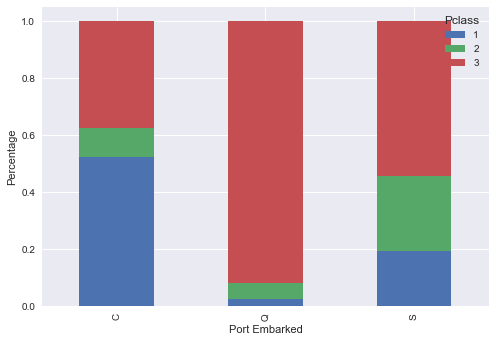

In [37]:
tab = pd.crosstab(combined['Embarked'], combined['Pclass'])
print(tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.xlabel('Port Embarked');
plt.ylabel('Percentage');

In [52]:
# 'S' seems to be the most representative for the overall Class Distribution
titanic.Pclass.value_counts()/len(titanic)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

**Learnings**:
- "C" was dominated by First Class Embarkements
- "Q" was almost only 3rd Class
- "S" follows the overall Class distribution

The 2nd point is somewhat curious, since we recall from above that the survival chances for "Q" were actually slightly better than for "S". Not significantly so, of course, but certainly not worse even though "S" had a higher percentage of 1st and 2nd class passengers.

It seems that embarking at "Q" improved your chances for survival if you were a 3rd class passenger. Let's investigate that a bit more:

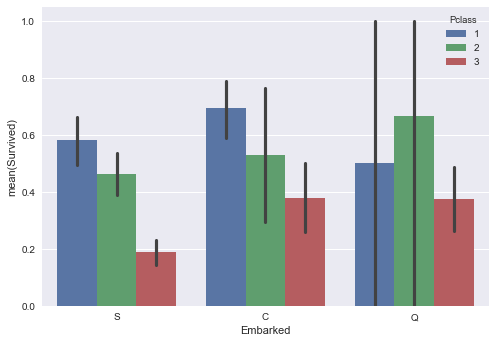

In [54]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=titanic);

For 3rd Class you had lower chances of survival when embarking in "S" and a significantly lower chance for 1st Class Passengers when embarking in 'Q', but remembering that there was just a small group embarking there, this might not be important as indicated by the Confidence Intervall.

There seems to be some impact here that isn't captured by the passenger class. What about the other strong feature, Sex?

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623


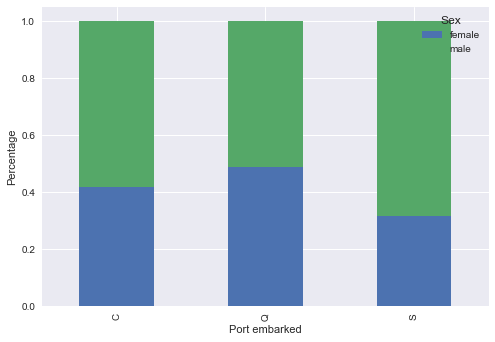

In [64]:
tab = pd.crosstab(combined['Embarked'], combined['Sex'])
print(tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.xlabel('Port embarked');
plt.ylabel('Percentage');

We see that C had the highest chance of men survival, which can be explained by the higher amount of 1st Class Passengers embarking. More men embarking on 'S' explain this difference.
This might be connected to a different gender ratio for the classes.
lets see...

Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493


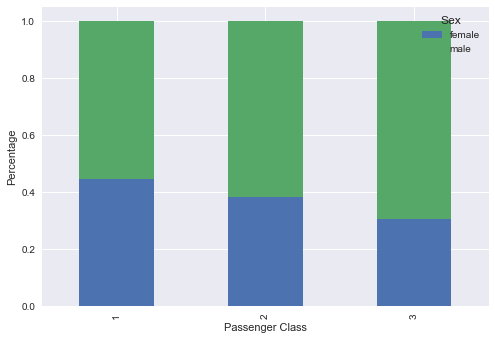

In [71]:
tab = pd.crosstab(combined['Pclass'], combined['Sex'])
print(tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.xlabel('Passenger Class');
plt.ylabel('Percentage');

maybe they where traveling alone? Maybe Men that have moved to the US comming back to see their families in Europe?

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


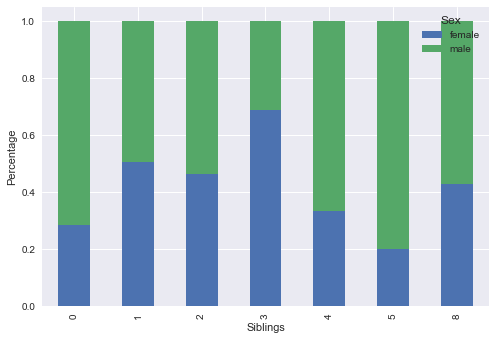

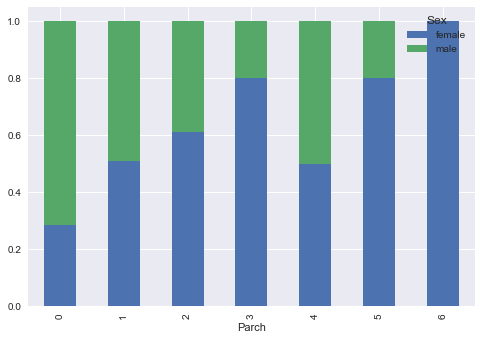

In [83]:
# Plotting Number of Siblings on Board
sib = pd.crosstab(titanic['SibSp'], titanic['Sex'] )
print(sib);
sib.div(sib.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True);
plt.xlabel('Siblings');
plt.ylabel('Percentage');

# Plotting Parent Child Relations
parch = pd.crosstab(titanic['Parch'], titanic['Sex']);
print(parch);
parch.div(parch.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);

Sort of, yes. This goes some way to explain features like better survival for SibSp = 1-3. But I think that it doesn't cover all the signal in the Parch feature.<br>

**We learn:**
- Different percentages of passenger classes and sexes have embarked from different ports, which is reflected in the lower survival rates for "S" (more men, fewer ) compared to "C" (more women and 1st class).
- It's hard to say at this stage whether there is any real impact left for the Embarked feature once we correct for these connections. We will come back to this in the modelling stage when we will study feature importances and significances (soon).

In [85]:
# Let's get an overview of the relation of Pclass Feature to the other numeric features
combined.groupby(combined['Pclass']).mean()

,Age,SibSp,Parch,Fare
Pclass,,,,
1,39.159930,0.436533,0.365325,87.508992
2,29.506705,0.393502,0.368231,21.179196
3,24.816367,0.568406,0.400564,13.302889


Age rises with Class, Families are larger in the 1st and 3rd Class but equally spread over all classes.

C:\Users\frank\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\frank\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\frank\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


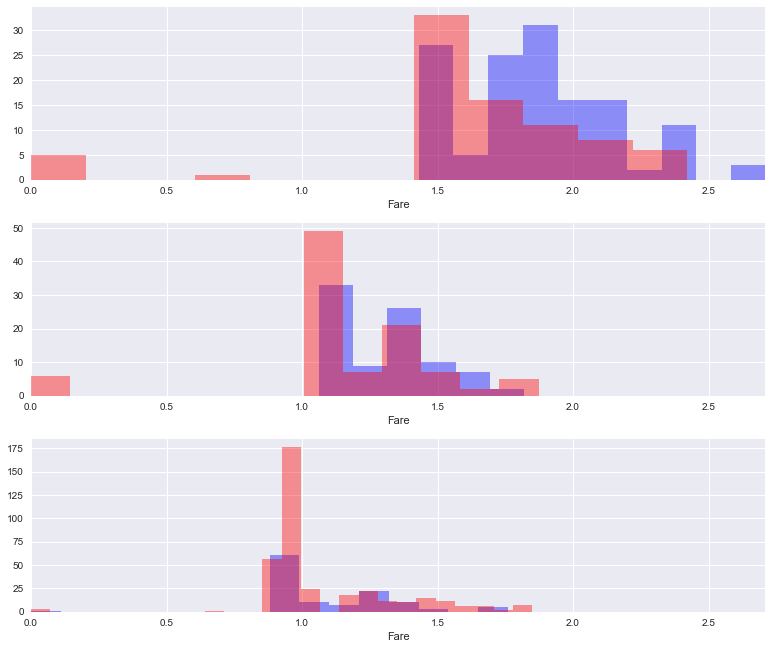

In [108]:
plt.figure(figsize=[12,10])
# 1st Class
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color='blue')
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color='red',
                  axlabel='Fare')
ax1.set_xlim(0, np.max(np.log10(titanic['Fare'].dropna().values)))

# 2nd Class
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color='blue')
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color='red',
                  axlabel='Fare')
ax2.set_xlim(0, np.max(np.log10(titanic['Fare'].dropna().values)))
# 3rd Class
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color='blue')
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color='red',
                  axlabel='Fare')
ax3.set_xlim(0, np.max(np.log10(titanic['Fare'].dropna().values)))

# Adjust the overall layout
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


**Learning**:<br>
- There is a broad distribution between the 1st class passenger fares (rich -> super rich)
- There's an interesting bimodality in the 2nd class cabins and a long tail in the 3rd class ones. (TODO: check cumulative fare question)
- For each class there is strong evidence that the cheapest cabins were bad for survival. A similar effect can be seen in a boxplot:

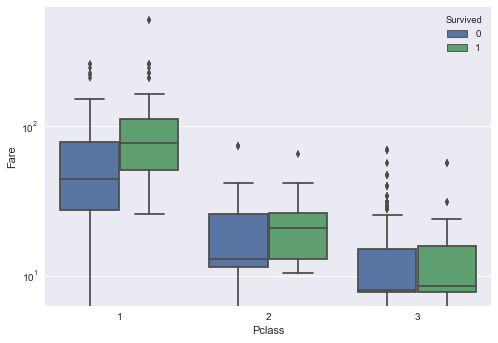

In [110]:
ax = sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic)
ax.set_yscale('log')

### Export Data for further Analysis


In [116]:
# Train Data splits based on Survival Status
surv.to_csv('data/survived.csv')
nosurv.to_csv('data/nosurvived.csv')

# Combined Dataset
combined.to_csv('data/combined.csv')

# Train Data splits based on Embarked Port
for harbour in combined.Embarked:
    combined[combined.Embarked==harbour].to_csv('data/train_subdata_departure_{}.csv'.format(harbour))